In [1]:
import scanpy as sc
import pandas as pd
import loompy 
import numpy as np 
import scvelo as scv
import cellrank as cr
import matplotlib.pyplot as plt
import matplotlib as mpl
from anndata import AnnData
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
scv.set_figure_params(dpi=120)
sc.settings.set_figure_params(dpi=120)
sc.settings.set_figure_params(dpi=150, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.4.2 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.7


In [2]:
ldata_10x = scv.read_loom("/proj/snic2020-16-146/10xgams/seurat_analysis/files/Velocyte/possorted_genome_bam_T88Y5.loom")
ldata_ss2 = scv.read_loom("/proj/snic2020-16-146/10xgams/seurat_analysis/files/Velocyte/gams_smart.loom")
anndata = sc.read_h5ad('/proj/snic2020-16-146/10xgams/seurat_analysis/results/single_cell/integrated_dataset_SS2_10X.h5ad')

In [5]:
anndata.obs_names

Index(['A10_R1.17_532', 'A10_R1.18_360', 'A10_R1.18_361', 'A11_R1.17_532',
       'A11_R1.18_360', 'A11_R1.18_361', 'A12_R1.17_532', 'A12_R1.18_360',
       'A12_R1.18_361', 'A13_R1.17_532',
       ...
       'TTTGGTTCATACTGTG-1', 'TTTGGTTGTAGCTTGT-1', 'TTTGTTGAGCACTGGA-1',
       'TTTGTTGAGCCTCATA-1', 'TTTGTTGCAGCTGTAT-1', 'TTTGTTGGTAAGGCTG-1',
       'TTTGTTGGTCGGTGTC-1', 'TTTGTTGGTCGTGGTC-1', 'TTTGTTGGTGAGTTGG-1',
       'TTTGTTGTCGAAGCAG-1'],
      dtype='object', length=5471)

In [6]:
ldata_ss2.obs_names = [i.replace('/crex/proj/uppstore2019072/10xgams/ss2_data/bam_all/A10_R1.17_532.bam:', '') for i in ldata_ss2.obs_names]
ldata_ss2.obs_names = [i.replace('.bam', '') for i in ldata_ss2.obs_names]

ldata_ss2.obs_names_make_unique()
ldata_ss2.obs_names

Index(['A10_R1.18_360', 'A10_R1.18_361', 'A11_R1.17_532', 'A11_R1.18_360',
       'A11_R1.18_361', 'A12_R1.17_532', 'A12_R1.18_360', 'A12_R1.18_361',
       'A13_R1.17_532', 'A13_R1.18_360',
       ...
       'P5_R1.18_361', 'P6_R1.17_532', 'P6_R1.18_360', 'P6_R1.18_361',
       'P7_R1.17_532', 'P7_R1.18_360', 'P8_R1.17_532', 'P8_R1.18_360',
       'P9_R1.17_532', 'P9_R1.18_360'],
      dtype='object', length=1085)

In [7]:
ldata_10x.obs_names = [i.replace('possorted_genome_bam_T88Y5:', '') for i in ldata_10x.obs_names]
ldata_10x.obs_names = [i.replace('x', '') for i in ldata_10x.obs_names]

ldata_10x.obs_names_make_unique()
ldata_10x.obs_names

Index(['AACCTTTCACTTACAG', 'AAACGAAAGGCGTCCT', 'AACAAGAGTATCAGCT',
       'AACCCAAGTCCAACGC', 'AAAGGTATCTCCACTG', 'AAAGGGCGTTCGTACA',
       'AACAAGACACGTAGTT', 'AAAGAACAGTGAACAT', 'AAAGAACAGCTCCACG',
       'AACCATGGTGAGCTCC',
       ...
       'TTTCATGGTACGTGTT', 'TTTACTGTCGCCAGTG', 'TTTCGATCAGACACAG',
       'TTTACGTGTGAGAACC', 'TTGTTTGCAACTAGAA', 'TTGTTGTGTGGTCTTA',
       'TTTACCAGTAGGCTCC', 'TTTGACTGTACTGCGC', 'TTGTTGTAGACTCATC',
       'TTTGGAGGTGCCGGTT'],
      dtype='object', length=4080)

In [93]:
#ldata_10x.obs_names
ldata_10x.write_loom('/proj/snic2020-16-146/10xgams/seurat_analysis/files/Velocyte/10X.loom')

In [8]:
#ldata_10x.layers['spanning'] = ldata_10x.X
ldata_10x

AnnData object with n_obs × n_vars = 4080 × 5358
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [15]:
out_file = '/proj/snic2020-16-146/10xgams/seurat_analysis/files/Velocyte/all_data.loom'
files = ['/proj/snic2020-16-146/10xgams/seurat_analysis/files/Velocyte/SS2.loom', 
        '/proj/snic2020-16-146/10xgams/seurat_analysis/files/Velocyte/10X.loom']
loompy.combine(files, out_file)

In [149]:
#ldata = ldata_ss2.concatenate(ldata_10x)

In [3]:
ldata = sc.read_loom('/proj/snic2020-16-146/10xgams/seurat_analysis/files/Velocyte/all_data.loom')
ldata.obs.set_index('obs_names', inplace=True)
ldata.obs
#ldata.write_loom('/proj/snic2020-16-146/10xgams/seurat_analysis/files/Velocyte/all_data.loom')

/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


""
obs_names
A10_R1.18_360
A10_R1.18_361
A11_R1.17_532
A11_R1.18_360
A11_R1.18_361
...
TTGTTGTGTGGTCTTA
TTTACCAGTAGGCTCC
TTTGACTGTACTGCGC


In [58]:
anndata.obs_names = [i.replace('-1', '') for i in anndata.obs_names]
#ldata_10x.obs_names = [i.replace('x', '') for i in ldata_10x.obs_names]

anndata.obs_names_make_unique()
anndata.obs_names

Index(['A10_R1.17_532', 'A10_R1.18_360', 'A10_R1.18_361', 'A11_R1.17_532',
       'A11_R1.18_360', 'A11_R1.18_361', 'A12_R1.17_532', 'A12_R1.18_360',
       'A12_R1.18_361', 'A13_R1.17_532',
       ...
       'TTTGGTTCATACTGTG', 'TTTGGTTGTAGCTTGT', 'TTTGTTGAGCACTGGA',
       'TTTGTTGAGCCTCATA', 'TTTGTTGCAGCTGTAT', 'TTTGTTGGTAAGGCTG',
       'TTTGTTGGTCGGTGTC', 'TTTGTTGGTCGTGGTC', 'TTTGTTGGTGAGTTGG',
       'TTTGTTGTCGAAGCAG'],
      dtype='object', length=5471)

In [59]:
ldata.obs_names

Index(['A10_R1.18_360', 'A10_R1.18_361', 'A11_R1.17_532', 'A11_R1.18_360',
       'A11_R1.18_361', 'A12_R1.17_532', 'A12_R1.18_360', 'A12_R1.18_361',
       'A13_R1.17_532', 'A13_R1.18_360',
       ...
       'TTTCATGGTACGTGTT', 'TTTACTGTCGCCAGTG', 'TTTCGATCAGACACAG',
       'TTTACGTGTGAGAACC', 'TTGTTTGCAACTAGAA', 'TTGTTGTGTGGTCTTA',
       'TTTACCAGTAGGCTCC', 'TTTGACTGTACTGCGC', 'TTGTTGTAGACTCATC',
       'TTTGGAGGTGCCGGTT'],
      dtype='object', name='obs_names', length=5165)

In [4]:
adata = scv.utils.merge(ldata, anndata)
adata

AnnData object with n_obs × n_vars = 4991 × 4912
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain_0.4', 'leiden_0.4', 'louvain_0.6', 'leiden_0.6', 'louvain_0.8', 'leiden_0.8', 'louvain_0.9', 'leiden_0.9', 'louvain_1.0', 'leiden_1.0', 'louvain_1.1', 'leiden_1.1', 'louvain_1.2', 'leiden_1.2', 'louvain_1.4', 'leiden_1.4', 'louvain_1.6', 'leiden_1.6', 'day', 'batch', 'sample', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'batch_colors', 'clusters_colors', 'day_colors', 'dendrogram_clusters', 'hvg', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_0.9_colors', 'leiden

In [63]:
adata.write_h5ad('/proj/snic2020-16-146/10xgams/seurat_analysis/results/single_cell/integrated_dataset_SS2_10X_velo.h5ad')
adata = sc.read_h5ad('/proj/snic2020-16-146/10xgams/seurat_analysis/results/single_cell/integrated_dataset_SS2_10X_velo.h5ad')

In [27]:

#adata.obs['batch'] = [i.replace('0', 'SS2') for i in adata.obs['batch']]
#adata.obs['batch'] = [i.replace('1', '10X') for i in adata.obs['batch']]

In [33]:
adata.uns['batch_colors'] 
adata.uns['batch_colors'] = ['#ff7f0e','#1f77b4']

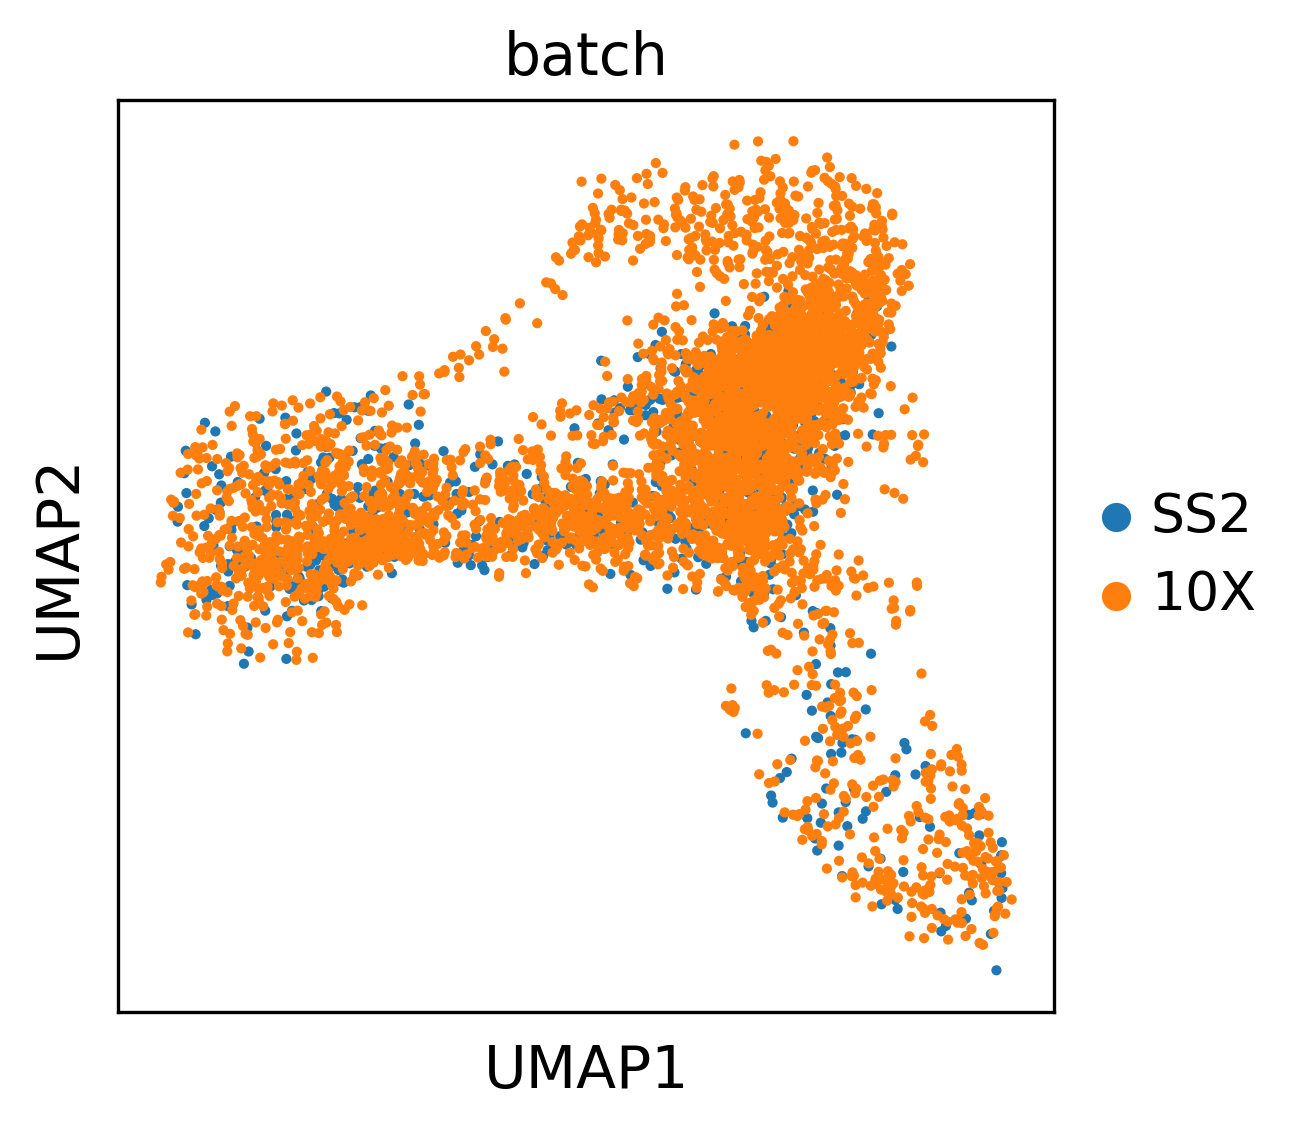

In [5]:
#adata.write_h5ad('/proj/snic2020-16-146/10xgams/seurat_analysis/results/single_cell/integrated_dataset_SS2_10X_velo.h5ad')
sc.pl.umap(adata, color ='batch')

NameError: name 'params' is not defined